In [1]:
import pandas as pd

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx"
data = pd.read_excel(url, sheet_name="Year 2009-2010")

# Display the first few rows of the dataset
print(data.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [2]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing CustomerID or Description
data.dropna(subset=['Customer ID', 'Description'], inplace=True)


Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


In [3]:
# Remove duplicate records
data.drop_duplicates(inplace=True)


In [4]:
# Filter out negative values
data = data[(data['Quantity'] > 0) & (data['Price'] > 0)]


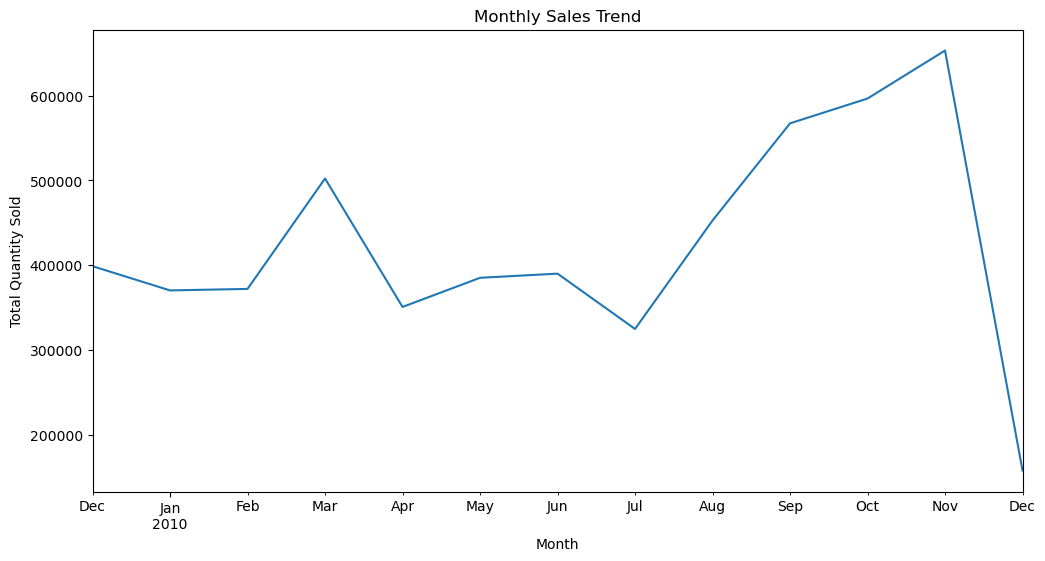

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert InvoiceDate to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Extract month and year from InvoiceDate
data['Month'] = data['InvoiceDate'].dt.to_period('M')

# Group by month and calculate total sales
monthly_sales = data.groupby('Month')['Quantity'].sum()

# Plot monthly sales
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.show()


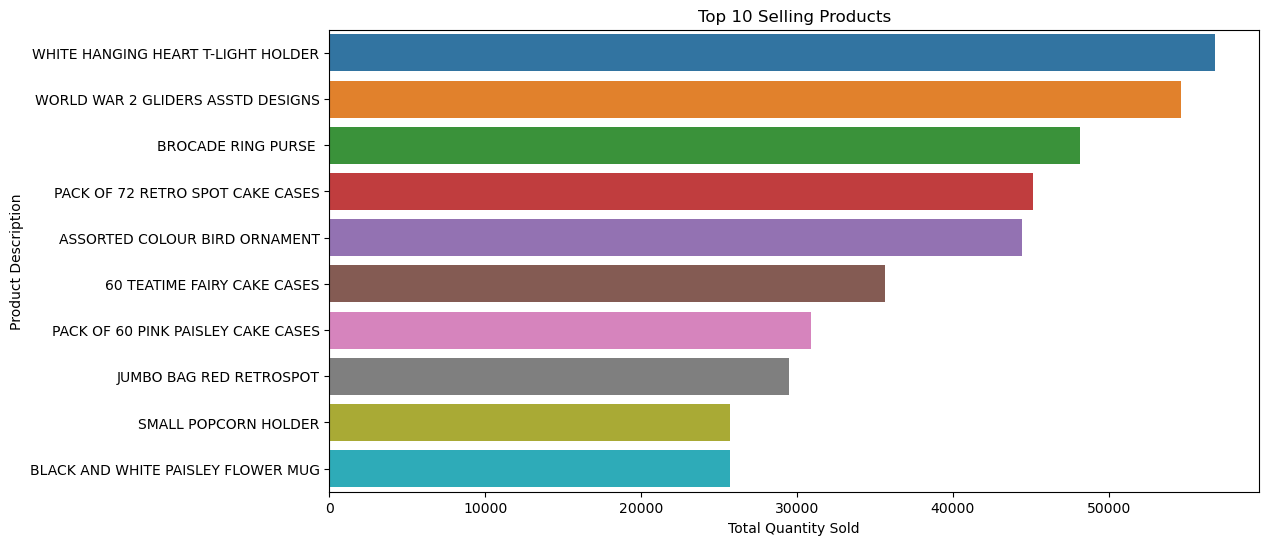

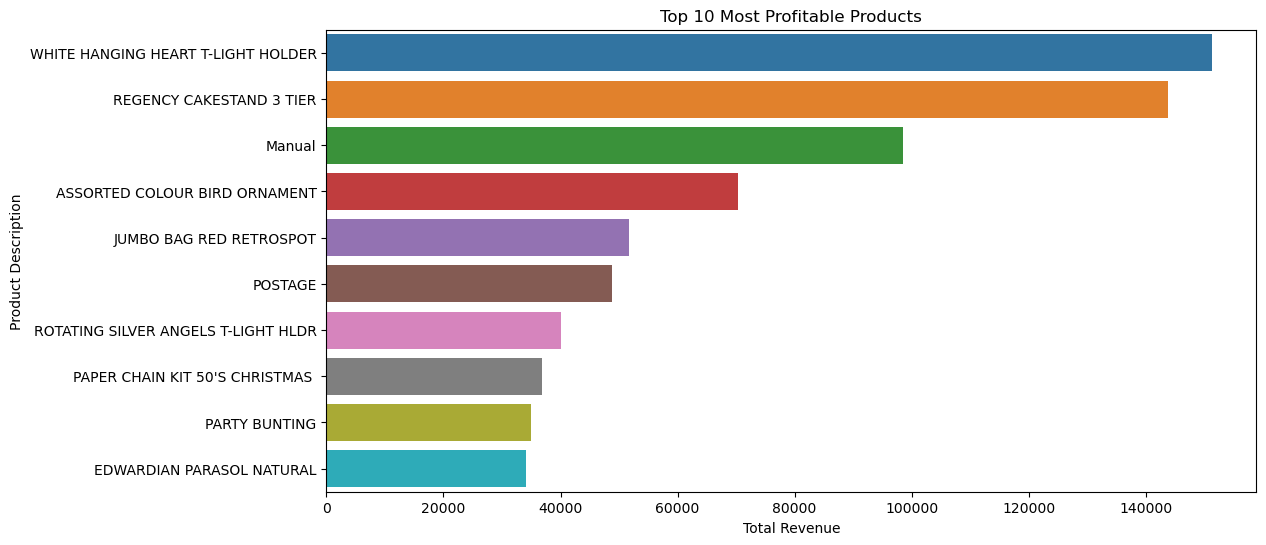

In [6]:
# Top-selling products
top_products = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plot top-selling products
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.show()

# Most profitable categories
data['Revenue'] = data['Quantity'] * data['Price']
top_categories = data.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)

# Plot most profitable categories
plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Total Revenue')
plt.ylabel('Product Description')
plt.show()


In [7]:
# Extract year, month, day, and weekday from InvoiceDate
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data['Day'] = data['InvoiceDate'].dt.day
data['Weekday'] = data['InvoiceDate'].dt.weekday


In [8]:
# Extract year, month, day, and weekday from InvoiceDate
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data['Day'] = data['InvoiceDate'].dt.day
data['Weekday'] = data['InvoiceDate'].dt.weekday


In [9]:
# Average purchase frequency
customer_freq = data.groupby('Customer ID').size().mean()

# Average spend per visit
avg_spend_per_visit = data.groupby('Customer ID')['Revenue'].mean()

# Total spend per customer
total_spend_per_customer = data.groupby('Customer ID')['Revenue'].sum()


In [10]:
# Stock turn rate
stock_turn_rate = data.groupby('StockCode')['Quantity'].sum() / data['Quantity'].sum()

# Average price per product
avg_price_per_product = data.groupby('StockCode')['Price'].mean()

# Sales volume per product
sales_volume_per_product = data.groupby('StockCode')['Quantity'].sum()


In [11]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Sample data creation (to replace with actual data loading)
# data = pd.read_csv('path_to_your_data.csv')

# Convert 'Month' to datetime
data['Month'] = pd.to_datetime(data['Month'])

# Aggregate monthly revenue
monthly_revenue = data.groupby('Month')['Revenue'].sum()

# Ensure the index is datetime
monthly_revenue.index = pd.to_datetime(monthly_revenue.index)

# Print the first few rows of monthly_revenue to ensure it's correct
print("Monthly Revenue:\n", monthly_revenue.head())

# Split the data into training and test sets
train = monthly_revenue[:'2010-12']
test = monthly_revenue['2011-01':]

# Print train and test to ensure they are split correctly
print("Train Set:\n", train)
print("Test Set:\n", test)

# Fit SARIMA model
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
result = model.fit()

# Forecast
forecast = result.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Forecast')
plt.title('Monthly Revenue Forecast using SARIMA')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend()
plt.show()


Monthly Revenue:
 Month
1970-01-01 00:00:00.000000001    555802.672
1970-01-01 00:00:00.000000002    504558.956
1970-01-01 00:00:00.000000003    696978.471
1970-01-01 00:00:00.000000004    591982.002
1970-01-01 00:00:00.000000005    597833.380
Name: Revenue, dtype: float64
Train Set:
 Month
1970-01-01 00:00:00.000000001     555802.672
1970-01-01 00:00:00.000000002     504558.956
1970-01-01 00:00:00.000000003     696978.471
1970-01-01 00:00:00.000000004     591982.002
1970-01-01 00:00:00.000000005     597833.380
1970-01-01 00:00:00.000000006     636371.130
1970-01-01 00:00:00.000000007     589736.170
1970-01-01 00:00:00.000000008     602224.600
1970-01-01 00:00:00.000000009     829013.951
1970-01-01 00:00:00.000000010    1033112.010
1970-01-01 00:00:00.000000011    1166460.022
1970-01-01 00:00:00.000000012     994160.380
Name: Revenue, dtype: float64
Test Set:
 Series([], Name: Revenue, dtype: float64)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =      

/Users/admin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
/Users/admin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
/Users/admin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/admin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations t

ValueError: Prediction must have `end` after `start`.

Random Forest: MAE=291978.6026666667, RMSE=297101.34872328455, MAPE=0.4804806753123434


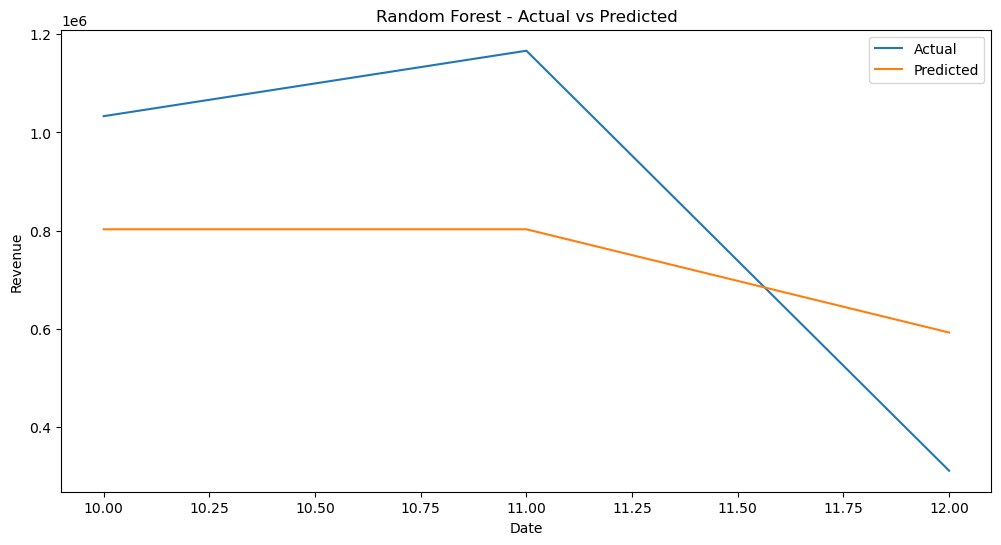

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

data['MonthYear'] = data['InvoiceDate'].dt.to_period('M')
features = data.groupby('MonthYear').agg({'Quantity': 'sum', 'Revenue': 'sum'}).reset_index()
features['Month'] = features['MonthYear'].dt.month
features['Year'] = features['MonthYear'].dt.year

# Target variable
target = features['Revenue']

# Drop unnecessary columns
features = features.drop(['MonthYear', 'Revenue'], axis=1)

# Prepare features and target as per your previous code
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

# Define and fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=5, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

print(f'Random Forest: MAE={mae_rf}, RMSE={rmse_rf}, MAPE={mape_rf}')

# Plot predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred_rf, label='Predicted')
plt.title('Random Forest - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()


Gradient Boosting: MAE=281428.483688861, RMSE=287096.4989991102, MAPE=0.4860653778407052


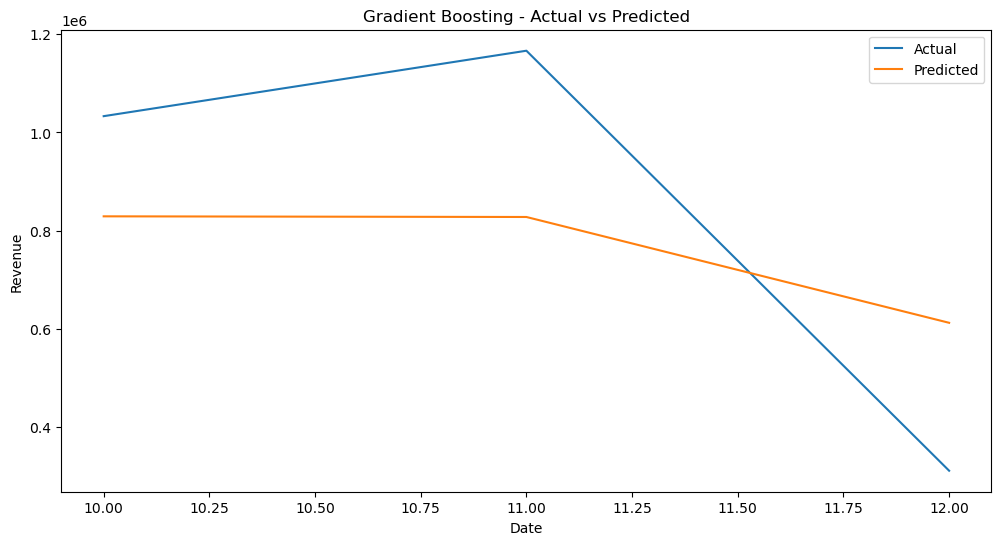

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

# Define and fit the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predict
y_pred_gb = gb_model.predict(X_test)

# Evaluation
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
mape_gb = mean_absolute_percentage_error(y_test, y_pred_gb)

print(f'Gradient Boosting: MAE={mae_gb}, RMSE={rmse_gb}, MAPE={mape_gb}')

# Plot predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred_gb, label='Predicted')
plt.title('Gradient Boosting - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()


SVR: MAE=429627.71297058836, RMSE=444274.10760023096, MAPE=0.6120942457290914


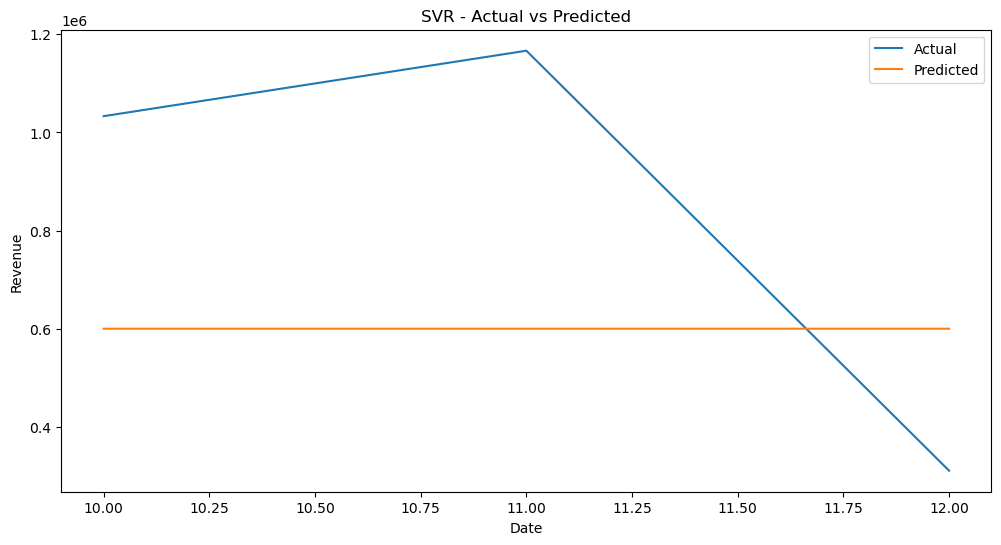

In [21]:
from sklearn.svm import SVR

# Define and fit the SVR model
svr_model = SVR()
svr_model.fit(X_train, y_train)

# Predict
y_pred_svr = svr_model.predict(X_test)

# Evaluation
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = mean_squared_error(y_test, y_pred_svr, squared=False)
mape_svr = mean_absolute_percentage_error(y_test, y_pred_svr)

print(f'SVR: MAE={mae_svr}, RMSE={rmse_svr}, MAPE={mape_svr}')

# Plot predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred_svr, label='Predicted')
plt.title('SVR - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()


Ridge Regression: MAE=211348.6737281156, RMSE=216656.182798601, MAPE=0.3139363406253263


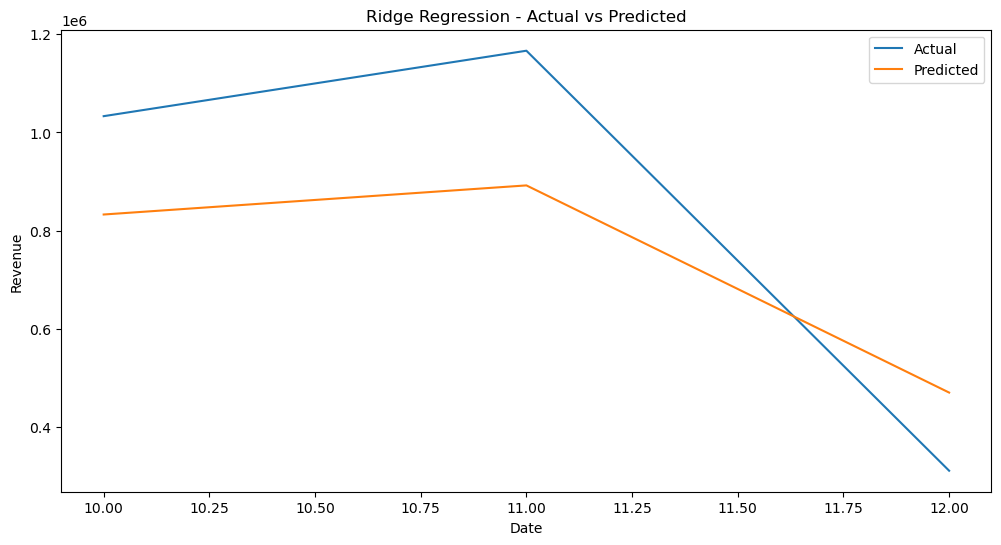

In [22]:
from sklearn.linear_model import Ridge

# Define and fit the Ridge Regression model
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Predict
y_pred_ridge = ridge_model.predict(X_test)

# Evaluation
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge)

print(f'Ridge Regression: MAE={mae_ridge}, RMSE={rmse_ridge}, MAPE={mape_ridge}')

# Plot predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred_ridge, label='Predicted')
plt.title('Ridge Regression - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()
